In [135]:
!pip install tensorflow

In [136]:
import pandas as pd

In [137]:
import tensorflow as tf

In [138]:
!pip install keras

In [139]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [140]:
df = pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# **EDA**

In [141]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [142]:
df.columns


Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [143]:
df=df.iloc[:,[0,1,2,7]]

In [144]:
#StandardScaler: Standardization
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
df.iloc[:,0:3] = se.fit_transform(df.iloc[:,0:3])
df

,AT,AP,AH,TEY
0,-1.439778,-0.826644,1.281436,114.70
1,-1.449601,-0.748647,1.304564,114.72
2,-1.434721,-0.686250,1.219086,114.71
3,-1.413702,-0.623853,1.169060,114.72
4,-1.368693,-0.545857,1.161883,114.72
...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,111.61
15035,-1.303986,-1.138630,1.447753,111.78
15036,-1.386267,-1.076233,1.476971,110.19
15037,-1.420423,-0.998236,1.441590,110.74


In [145]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [146]:
#Training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3,random_state=30)

In [147]:
X_train.shape

(10527, 3)

# **Model Building**

In [148]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=3, kernel_initializer='uniform', activation='linear')) #1st layer
model.add(Dense(8, kernel_initializer='uniform',  activation='linear')) #2nd layer
model.add(Dense(1, kernel_initializer='uniform', activation='linear')) #output layer

In [149]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [150]:
# Fit the model
h = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=40)

# evaluate the model on train data
scores = model.evaluate(X_train, Y_train)
print(model.metrics_names[1], scores[1]*100)

Epoch 1/100
211/211 [==============================] - 2s 4ms/step - loss: 17904.8730 - mse: 17904.8730 - val_loss: 16878.8203 - val_mse: 16878.8203
Epoch 2/100
211/211 [==============================] - 0s 2ms/step - loss: 13333.4980 - mse: 13333.4980 - val_loss: 8612.0254 - val_mse: 8612.0254
Epoch 3/100
211/211 [==============================] - 1s 3ms/step - loss: 4129.0703 - mse: 4129.0703 - val_loss: 1021.9904 - val_mse: 1021.9904
Epoch 4/100
211/211 [==============================] - 1s 3ms/step - loss: 407.1958 - mse: 407.1958 - val_loss: 225.8598 - val_mse: 225.8598
Epoch 5/100
211/211 [==============================] - 0s 2ms/step - loss: 220.6557 - mse: 220.6557 - val_loss: 222.0578 - val_mse: 222.0578
Epoch 6/100
211/211 [==============================] - 1s 3ms/step - loss: 219.8908 - mse: 219.8908 - val_loss: 221.0103 - val_mse: 221.0103
Epoch 7/100
211/211 [==============================] - 0s 2ms/step - loss: 220.0589 - mse: 220.0589 - val_loss: 221.1426 - val_mse: 221.

In [151]:
y_pred = model.predict(X_train)

329/329 [==============================] - 1s 2ms/step


In [152]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
mean_absolute_error(Y_train,y_pred)

11.746986675260638

In [153]:
# testing data
test_score = model.evaluate(X_test,Y_test)

141/141 [==============================] - 0s 2ms/step - loss: 226.1507 - mse: 226.1507


In [154]:
y_test_pred = model.predict(X_test)

141/141 [==============================] - 0s 2ms/step


In [155]:
mean_absolute_error(Y_test,y_test_pred)

11.94922068697341

In [156]:
mean_squared_error(Y_test,y_test_pred)

226.15078040038264

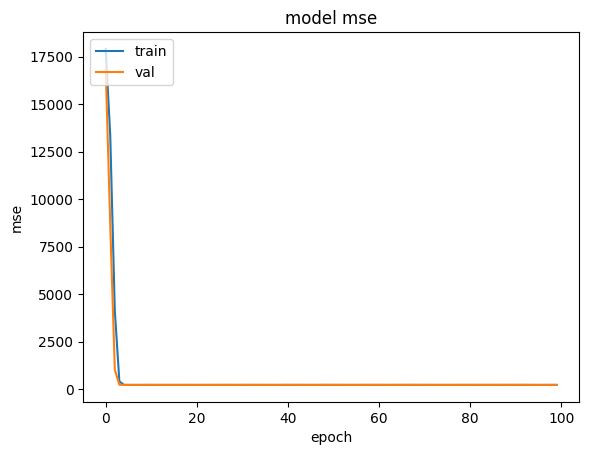

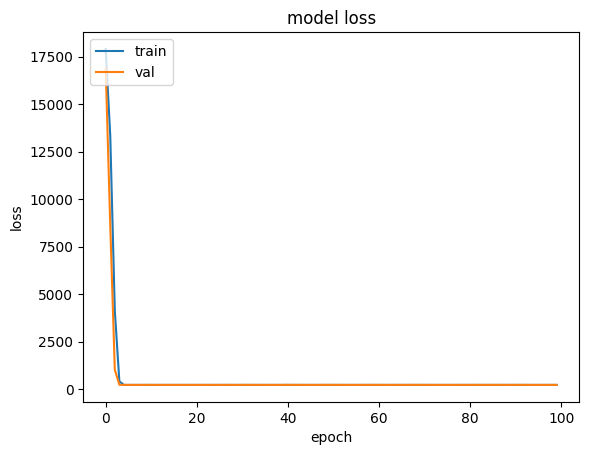

In [157]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(h.history['mse'])
plt.plot(h.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Hyperparameter tuning**


In [158]:
!pip install scikeras

In [159]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier,KerasRegressor
#from keras.optimizers import Adam
#from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam

In [160]:
# Selecting first 500 records
X = x.iloc[0:500,:]
# Selecting first 500 records
Y = y.iloc[0:500]

In [161]:
#Turning Hyperparameter: Batch Size and epochs


    # create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])
    return model


In [163]:
# Create the model
model = KerasRegressor(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END ...batch_size=10, epochs=10;, score=-79.883 total time=   3.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END ..batch_size=10, epochs=10;, score=-482.904 total time=   3.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END ...batch_size=10, epochs=10;, score=-40.576 total time=   3.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END ...batch_size=10, epochs=10;, score=-35.473 total time=   6.2s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END ...batch_size=10, epochs=10;, score=-30.905 total time=   2.7s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END ....batch_size=10, epochs=50;, score=-3.563 total time=   5.2s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END ...batch_size=10, epochs=50;, score=-19.559 total time=   6.3s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END ....batch_size=10, epochs=50;, score=-1.392 total time=   6.0s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END ....batch_size=10, epochs=50;, score=-1.046 total time=  11.9s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.553 total time=   4.0s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ...batch_size=10, epochs=100;, score=-1.126 total time=  11.4s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END ...batch_size=10, epochs=100;, score=-3.461 total time=  11.3s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.511 total time=  10.2s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.339 total time=   8.8s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.119 total time=  21.5s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END ..batch_size=20, epochs=10;, score=-193.810 total time=   1.5s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END ..batch_size=20, epochs=10;, score=-560.438 total time=   1.5s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END ...batch_size=20, epochs=10;, score=-85.344 total time=   1.5s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END ...batch_size=20, epochs=10;, score=-56.701 total time=   1.2s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END ...batch_size=20, epochs=10;, score=-81.286 total time=   1.2s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END ....batch_size=20, epochs=50;, score=-5.039 total time=   3.4s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END ..batch_size=20, epochs=50;, score=-131.559 total time=   3.1s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END ....batch_size=20, epochs=50;, score=-4.191 total time=   2.5s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END ....batch_size=20, epochs=50;, score=-3.213 total time=   2.5s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.642 total time=   6.0s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ...batch_size=20, epochs=100;, score=-3.422 total time=   7.1s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END ..batch_size=20, epochs=100;, score=-18.017 total time=   4.2s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ...batch_size=20, epochs=100;, score=-1.407 total time=   5.1s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.935 total time=   5.9s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.620 total time=   7.9s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END ..batch_size=40, epochs=10;, score=-212.960 total time=   1.4s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END ..batch_size=40, epochs=10;, score=-584.899 total time=   1.5s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END ...batch_size=40, epochs=10;, score=-92.600 total time=   4.0s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END ...batch_size=40, epochs=10;, score=-62.434 total time=   1.6s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END ...batch_size=40, epochs=10;, score=-85.676 total time=   2.4s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END ..batch_size=40, epochs=50;, score=-148.314 total time=   4.3s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END ..batch_size=40, epochs=50;, score=-369.811 total time=   3.6s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END ...batch_size=40, epochs=50;, score=-17.343 total time=   1.9s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END ...batch_size=40, epochs=50;, score=-16.012 total time=   2.2s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END ....batch_size=40, epochs=50;, score=-8.004 total time=   3.9s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ..batch_size=40, epochs=100;, score=-12.292 total time=   4.1s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END .batch_size=40, epochs=100;, score=-167.155 total time=   3.2s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ...batch_size=40, epochs=100;, score=-3.649 total time=   3.5s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ...batch_size=40, epochs=100;, score=-6.365 total time=   3.9s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ...batch_size=40, epochs=100;, score=-1.074 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best : -1.1111333499122447, using {'batch_size': 10, 'epochs': 100}


# Best : -1.1111333499122447, using {'batch_size': 10, 'epochs': 100}

# **Model Building using Hypertuning parameter**

In [165]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=3, kernel_initializer='uniform', activation='linear')) #1st layer
model.add(Dense(8, kernel_initializer='uniform',  activation='linear')) #2nd layer
model.add(Dense(1, kernel_initializer='uniform', activation='linear')) #output layer

In [166]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [167]:
# Fit the model
h = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=10)

# evaluate the model on train data
scores = model.evaluate(X_train, Y_train)
print(model.metrics_names[1], scores[1]*100)

Epoch 1/100
843/843 [==============================] - 3s 2ms/step - loss: 9018.1797 - mse: 9018.1797 - val_loss: 228.9292 - val_mse: 228.9292
Epoch 2/100
843/843 [==============================] - 3s 3ms/step - loss: 220.7740 - mse: 220.7740 - val_loss: 221.8577 - val_mse: 221.8577
Epoch 3/100
843/843 [==============================] - 2s 3ms/step - loss: 220.7415 - mse: 220.7415 - val_loss: 220.7329 - val_mse: 220.7329
Epoch 4/100
843/843 [==============================] - 2s 2ms/step - loss: 220.9066 - mse: 220.9066 - val_loss: 224.0288 - val_mse: 224.0288
Epoch 5/100
843/843 [==============================] - 2s 2ms/step - loss: 220.9195 - mse: 220.9195 - val_loss: 222.1508 - val_mse: 222.1508
Epoch 6/100
843/843 [==============================] - 2s 2ms/step - loss: 220.7434 - mse: 220.7434 - val_loss: 222.3372 - val_mse: 222.3372
Epoch 7/100
843/843 [==============================] - 2s 2ms/step - loss: 221.0713 - mse: 221.0713 - val_loss: 222.2791 - val_mse: 222.2791
Epoch 8/100

In [168]:
y_pred = model.predict(X_train)

329/329 [==============================] - 1s 1ms/step


In [169]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
mean_absolute_error(Y_train,y_pred)

12.165318925128632

In [171]:
# testing data
test_score = model.evaluate(X_test,Y_test)

141/141 [==============================] - 0s 2ms/step - loss: 233.4798 - mse: 233.4798


In [170]:
y_test_pred = model.predict(X_test)

141/141 [==============================] - 0s 1ms/step


In [172]:
mean_absolute_error(Y_test,y_test_pred)

12.359967234523582

In [173]:
mean_squared_error(Y_test,y_test_pred)

233.47968094172128